# 🎵 Análise de Músicas do Spotify

## Configuração Inicial



Check these steps and adjust your code accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Adicionar o diretório pai ao PATH do Python
import sys
sys.path.append(str(Path('.').resolve().parent))

# Importar funções específicas
from src.data_preprocessing import clean_spotify_data
from src.visualization import *
from src.data_analysis import *

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_theme()
sns.set_palette('viridis')

## Carregamento e Visão Geral dos Dados

In [25]:
# Verificar e criar estrutura de diretórios
import os
from pathlib import Path
import sys

# Add project root to Python path
PROJECT_ROOT = Path('..').resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Now imports should work
from src.data_preprocessing import clean_spotify_data
from src.visualization import *
from src.data_analysis import *

# Verify imports
print("✅ Imports successful")
print(f"Project root: {PROJECT_ROOT}")

# Setup paths
PROJECT_ROOT = Path('..').resolve()
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'

# Ensure directories exist
RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

# Define file paths com nome correto do arquivo
RAW_FILE = RAW_DIR / 'spotify_songs.csv'  # Nome correto do arquivo
PROCESSED_FILE = PROCESSED_DIR / 'spotify_cleaned.csv'

# Verify raw data file exists
if not RAW_FILE.exists():
    print("⚠️ Arquivo de dados não encontrado!")
    print(f"Por favor, coloque o arquivo 'spotify_songs.csv' em:")
    print(f"{RAW_FILE}")
    raise FileNotFoundError(f"Arquivo não encontrado: {RAW_FILE}")

# Process or load data
try:
    print("📊 Processando dados...")
    # Force reprocessing by deleting existing processed file
    if PROCESSED_FILE.exists():
        PROCESSED_FILE.unlink()
    
    df_raw = pd.read_csv(RAW_FILE)
    df = clean_spotify_data(df_raw)
    df.to_csv(PROCESSED_FILE, index=False)
    print("✅ Dados processados e salvos!")
    
    # Verificar se a coluna existe
    if 'released_date' not in df.columns:
        raise KeyError("Coluna 'released_date' não encontrada após pré-processamento!")
        
    # Convert date column
    df['released_date'] = pd.to_datetime(df['released_date'])
    
    print("\n📊 Informações do Dataset:")
    print(f"Dimensões: {df.shape}")
    df.info()
    
except Exception as e:
    
    print(f"❌ Erro ao processar dados: {str(e)}")
    raise

✅ Imports successful
Project root: C:\Users\tiago\OneDrive\Área de Trabalho\meus cursos\data-analyst-project
📊 Processando dados...
❌ Erro ao processar dados: 'released_date'


KeyError: 'released_date'

## 1. Validação dos Dados Processados

In [8]:
df = pd.read_csv(r'C:\Users\tiago\OneDrive\Área de Trabalho\meus cursos\data-analyst-project\data\processed\spotify_cleaned.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tiago\\OneDrive\\Área de Trabalho\\meus cursos\\data-analyst-project\\data\\processed\\spotify_cleaned.csv'

In [5]:
# Verificar estrutura dos dados
print("\n📊 Colunas do Dataset:")
print(df.columns.tolist())

print("\n📊 Tipos de Dados:")
print(df.dtypes)

print("\n📊 Valores Ausentes:")
print(df.isnull().sum())

print("\n📊 Primeiras Linhas:")
display(df.head())


📊 Colunas do Dataset:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url', 'released_date', 'ano', 'mes']

📊 Tipos de Dados:
track_name                      object
artist(s)_name                  object
artist_count                     int64
released_year                    int64
released_month                   int64
released_day                     int64
in_spotify_playlists             int64
in_spotify_charts                int64
streams                        float64
in_apple_playlists               int64
in_apple_charts                  int64
in_deezer_playlists             object
in_deezer_charts                 int64
in_shazam_c

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,released_date,ano,mes
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,89,83,31,0,8,4,Not Found,2023-07-14,2023,7
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,2023-03-23,2023,3
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,2023-06-30,2023,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,2019-08-23,2019,8
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,2023-05-18,2023,5


## 2. Análise Exploratória Básica

In [6]:
# Estatísticas descritivas
print("\n📊 Estatísticas Básicas:")
display(df.describe())

# Análise temporal
df['ano'] = df['released_date'].dt.year
df['mes'] = df['released_date'].dt.month

print("\n📊 Distribuição por Ano:")
display(df['ano'].value_counts().sort_index())

print("\n📊 Top 10 Artistas:")
display(df['artist(s)_name'].value_counts().head(10))


📊 Estatísticas Básicas:


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date,ano,mes
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,...,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,2.666317,...,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018-09-10 05:09:45.519412480,2018.238195,6.033578
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00,1930.000000,1.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,...,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00,2020.000000,3.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,0.000000,...,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00,2022.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,...,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00,2022.000000,9.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,...,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00,2023.000000,12.000000
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,6.035599,...,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN,11.116218,3.566435



📊 Distribuição por Ano:


ano
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


📊 Top 10 Artistas:


artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64

## 3. Visualizações Estratégicas

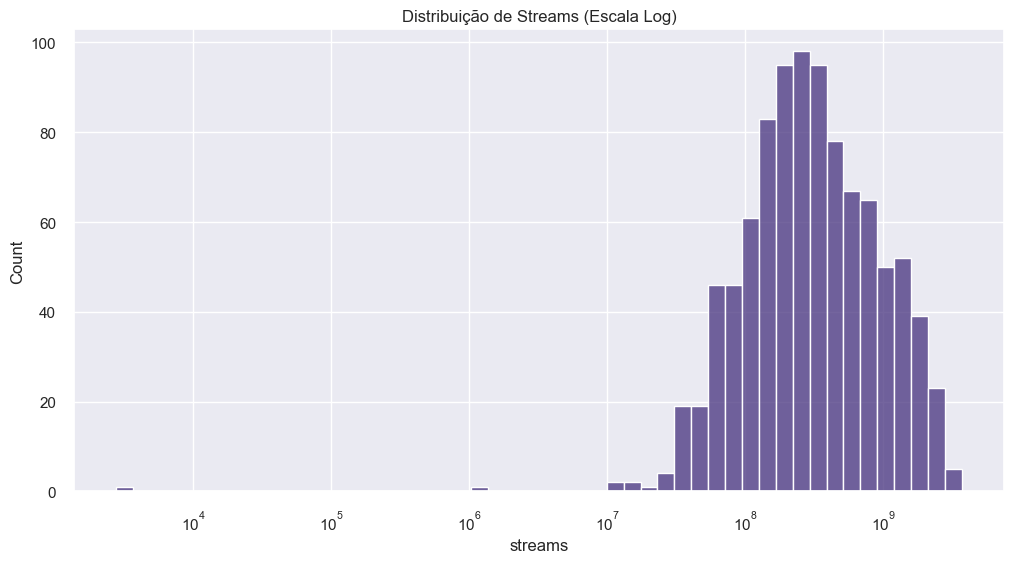

ValueError: Could not interpret value `danceability` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [7]:
# Distribuição de Streams
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='streams', bins=50, log_scale=True)
plt.title('Distribuição de Streams (Escala Log)')
plt.show()

# Relação entre Features
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='popularity', size='streams')
plt.title('Danceability vs Energy')
plt.show()

# Streams por Ano
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ano', y='streams')
plt.title('Distribuição de Streams por Ano')
plt.xticks(rotation=45)
plt.show()

## 4. Análise Aprofundada

In [ ]:
# Correlação entre variáveis
features_numericas = ['streams', 'danceability', 'energy', 'valence', 'popularity']
correlation = df[features_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Análise sazonal
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='mes')
plt.title('Distribuição de Lançamentos por Mês')
plt.show()

KeyError: "['danceability', 'energy', 'valence', 'popularity'] not in index"

## 5. Insights e Conclusões

### Principais Descobertas:

1. **Distribuição de Streams**
   - [Adicione suas observações aqui]

2. **Características Musicais**
   - [Adicione suas observações aqui]

3. **Padrões Temporais**
   - [Adicione suas observações aqui]

4. **Correlações Importantes**
   - [Adicione suas observações aqui]

### Recomendações:
- [Liste suas recomendações baseadas nas análises]



📊 Colunas disponíveis no DataFrame:
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']

📅 Criando coluna de data...

✅ Pré-processamento concluído!


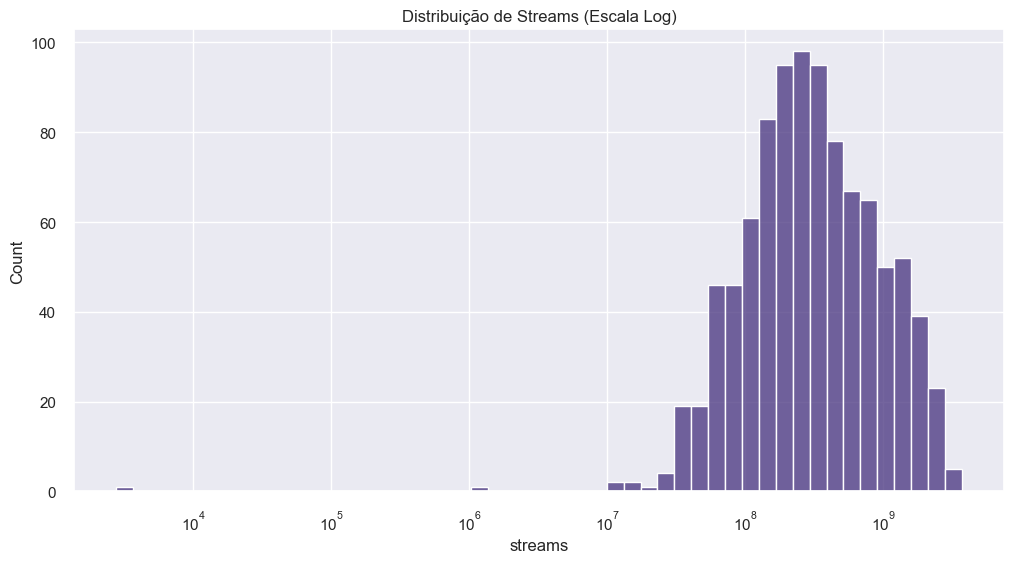

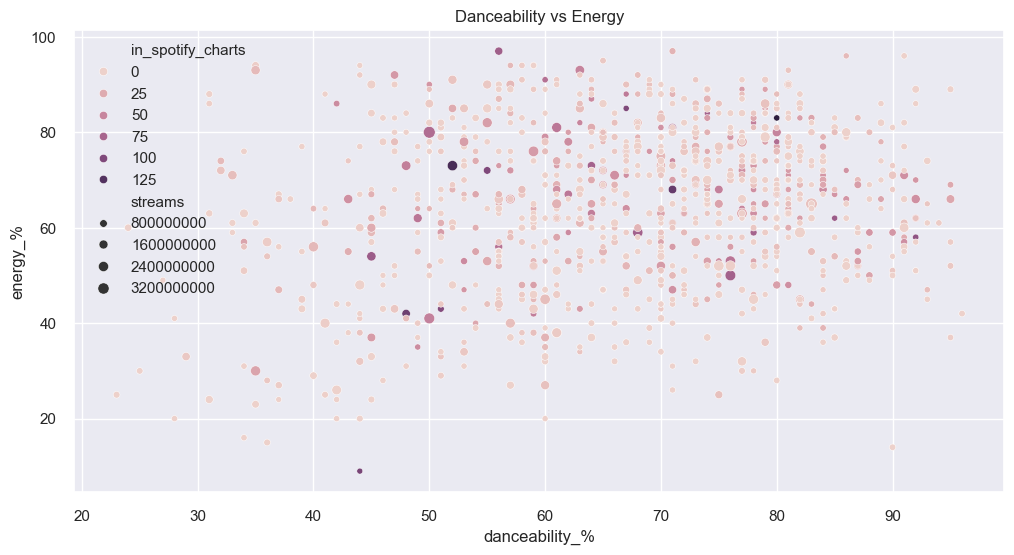

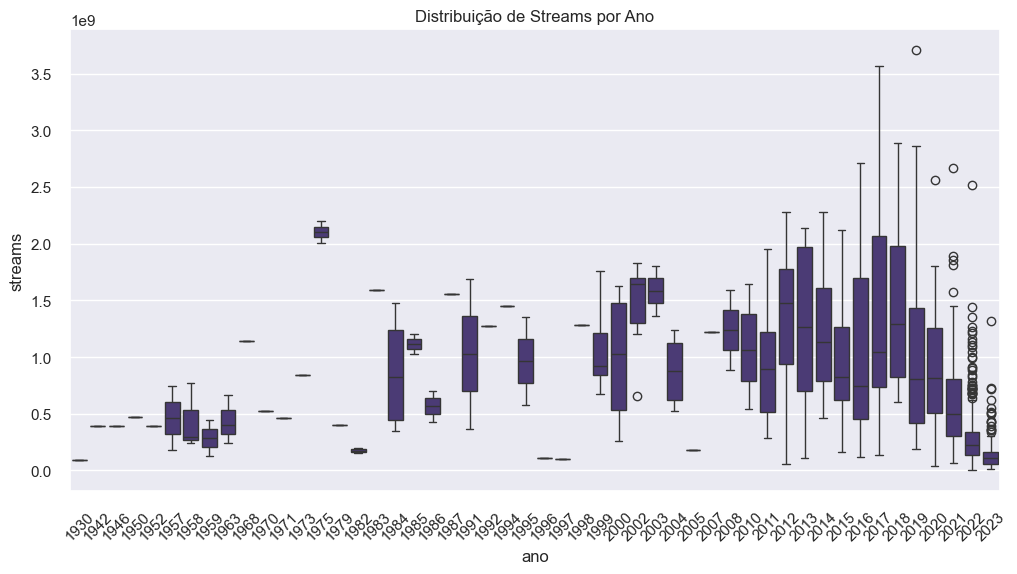

In [29]:
# Visualizações com nomes corretos das colunas

# 1. Distribuição de Streams
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='streams', bins=50, log_scale=True)
plt.title('Distribuição de Streams (Escala Log)')
plt.show()

# 2. Relação entre Features
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='danceability_%', 
    y='energy_%', 
    hue='in_spotify_charts',
    size='streams'
)
plt.title('Danceability vs Energy')
plt.show()

# 3. Streams por Ano
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ano', y='streams')
plt.title('Distribuição de Streams por Ano')
plt.xticks(rotation=45)
plt.show()

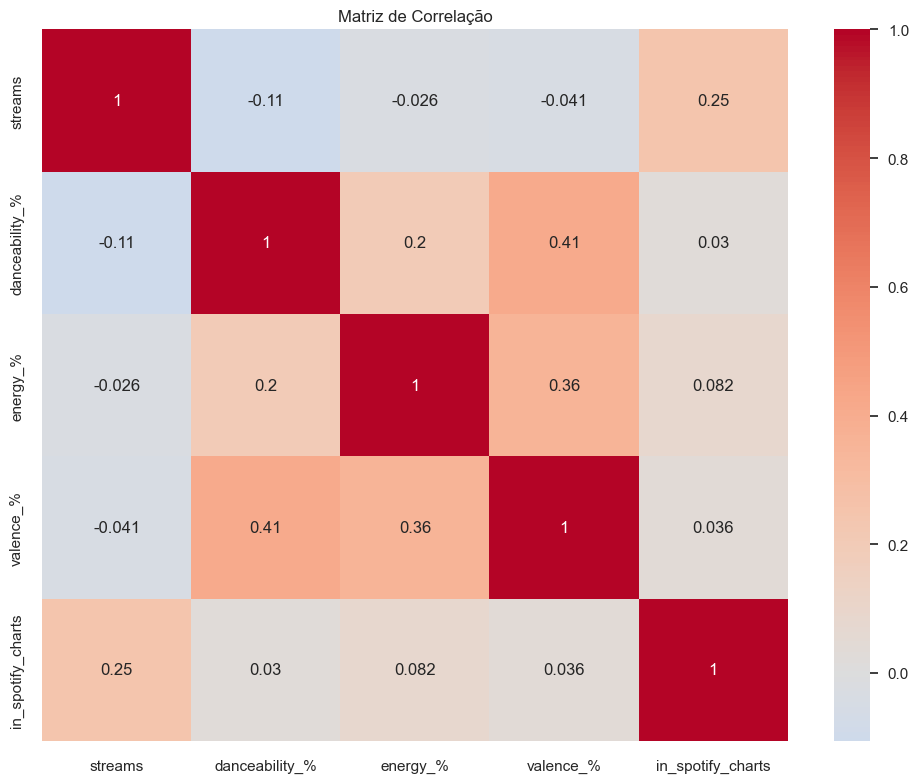

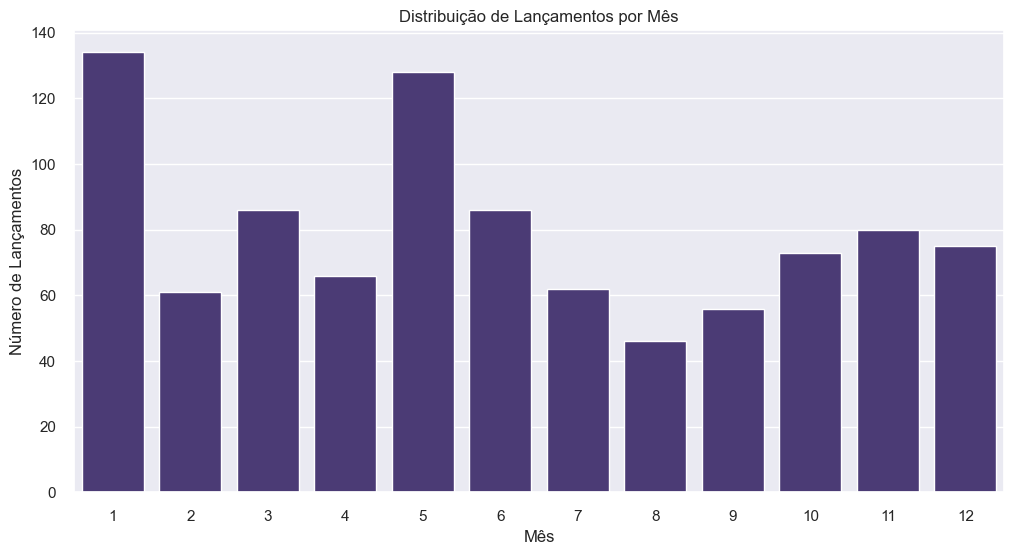

In [30]:
# Análise de correlação com nomes corretos
features_numericas = [
    'streams', 
    'danceability_%', 
    'energy_%', 
    'valence_%', 
    'in_spotify_charts'
]

correlation = df[features_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

# Análise temporal
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='mes')
plt.title('Distribuição de Lançamentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Lançamentos')
plt.show()